In [1]:
import matplotlib.pyplot as plt
import numpy as np
import h5py as h5


In [3]:
MLE_true = np.zeros(3)
MLE_true[0],_ = round(0.9057416142214763, 3), round(0.0014606118127611098, 3)
MLE_true[1],_ = round(0.16665828436620822, 3), round(0.0024564737893772097, 3)
MLE_true[2],_ = round(0.5949471716482038, 3), round(0.0058668909348001015, 3)

In [81]:
MLE_true

array([0.906, 0.167, 0.595])

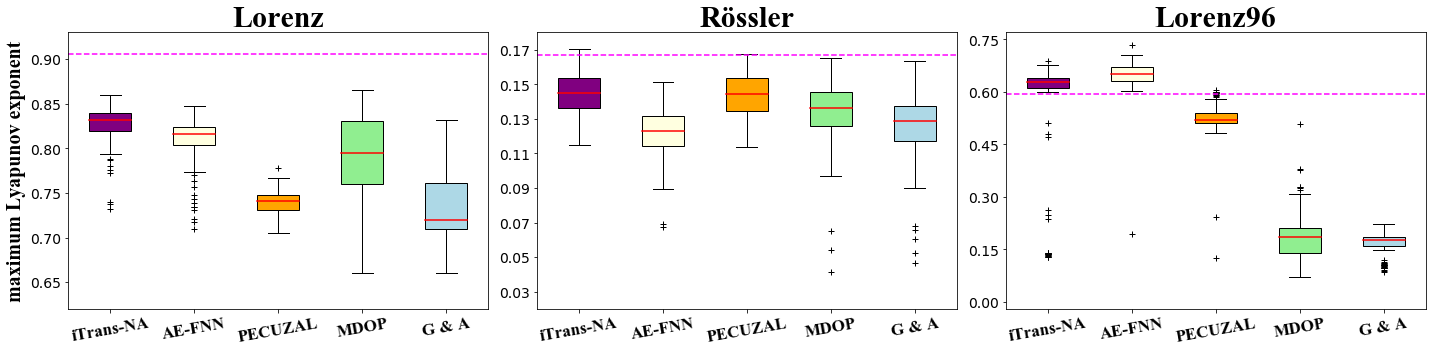

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,5))

font_style = {'family': 'Times New Roman'}

graph = ax[0].boxplot([MLE_est1[i] for i in range(5)], sym='+', notch=False,patch_artist=True,showmeans=False,\
         medianprops={'color': 'red', 'linewidth': '1.5'},)
ax[0].set_title('Lorenz', fontsize=30, fontweight='bold', fontdict=font_style)
ax[0].set_xticklabels(["iTrans-NA", "AE-FNN", "PECUZAL", "MDOP", "G & A"],rotation=10,fontsize=17,fontdict=font_style)
ax[0].set_ylim(0.62, 0.93)
ax[0].set_yticks([0.65,0.7,0.75,0.8,0.85,0.9])
ax[0].set_ylabel('maximum Lyapunov exponent', fontdict=font_style, fontsize=20)
colors = ['purple','lightyellow','orange','lightgreen','lightblue']
for patch, color in zip(graph['boxes'], colors):
    patch.set_facecolor(color)
ax[0].axhline(y=MLE_true[0], color='magenta', ls='--')
yticks = ax[0].get_yticklabels()
for ytick in yticks:
    ytick.set_fontsize(14)

graph = ax[1].boxplot([MLE_est2[i] for i in range(5)], sym='+', notch=False,patch_artist=True,showmeans=False,\
         medianprops={'color': 'red', 'linewidth': '1.5'},)
ax[1].set_title('Rössler', fontsize=30, fontweight='bold', fontdict=font_style)
ax[1].set_xticklabels(["iTrans-NA", "AE-FNN", "PECUZAL", "MDOP", "G & A"],rotation=10,fontsize=17,fontdict=font_style)
ax[1].set_ylim(0.02, 0.18)
ax[1].set_yticks([0.03,0.05,0.07,0.09,0.11,0.13,0.15,0.17])
# ax[1].set_ylabel('maximum Lyapunov exponent', fontdict=font_style, fontsize=20)
colors = ['purple','lightyellow','orange','lightgreen','lightblue']
for patch, color in zip(graph['boxes'], colors):
    patch.set_facecolor(color)
ax[1].axhline(y=MLE_true[1], color='magenta', ls='--')
yticks = ax[1].get_yticklabels()
for ytick in yticks:
    ytick.set_fontsize(14)

graph = ax[2].boxplot([MLE_est3[i] for i in range(5)], sym='+', notch=False,patch_artist=True,showmeans=False,\
         medianprops={'color': 'red', 'linewidth': '1.5'},)
ax[2].set_title('Lorenz96', fontsize=30, fontweight='bold', fontdict=font_style)
ax[2].set_xticklabels(["iTrans-NA", "AE-FNN", "PECUZAL", "MDOP", "G & A"],rotation=10,fontsize=17,fontdict=font_style)
ax[2].set_ylim(-0.02, 0.77)
ax[2].set_yticks([0.0,0.15,0.3,0.45,0.6,0.75])
# ax[2].set_ylabel('maximum Lyapunov exponent', fontdict=font_style, fontsize=20)
colors = ['purple','lightyellow','orange','lightgreen','lightblue']
for patch, color in zip(graph['boxes'], colors):
    patch.set_facecolor(color)
ax[2].axhline(y=MLE_true[2], color='magenta', ls='--')
yticks = ax[2].get_yticklabels()
for ytick in yticks:
    ytick.set_fontsize(14)


plt.tight_layout()
plt.savefig('./instability/MaxLE_estimate_plot.svg', format='svg', dpi=300)
plt.show()

In [2]:
MLE_est1, MLE_est2, MLE_est3 = np.zeros((5,100)), np.zeros((5,100)), np.zeros((5,100))
method_list = ["iTrans-NA", "AE-FNN", "PECUZAL", "MDOP", "GA"]
for i in range(5):
    fid = h5.File("E:/LearningEmbedding/instability/MLE_lorenz_"+method_list[i]+".h5", mode="r")
    MLE_est1[i] = fid["MLE"][()]

    fid.close()

for i in range(5):
    fid = h5.File("E:/LearningEmbedding/instability/MLE_rossler_"+method_list[i]+".h5", mode="r")
    MLE_est2[i] = fid["MLE"][()]

    fid.close()

for i in range(5):
    fid = h5.File("E:/LearningEmbedding/instability/MLE_lorenz96_"+method_list[i]+".h5", mode="r")
    MLE_est3[i] = fid["MLE"][()]

    fid.close()
# plt.boxplot([MLE_est[i] for i in range(5)])

# plt.title('Box Plot Example')
# plt.xlabel('Data')
# plt.ylabel('Value')
 
# # 显示图形
# plt.show()